In [47]:
import os

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import copy

import time

import torch.optim as optim
#from dataset import train_dataloader, val_dataloader
#from dataset import train_dataset, val_dataset
from tqdm import tqdm

from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
import numpy as np

from sklearn.model_selection import cross_val_score

import pickle
from sklearn.preprocessing import MinMaxScaler

pd.options.display.max_columns = None

from sklearn.linear_model import LogisticRegression

In [48]:
main_dir = os.path.abspath('..') # os.path.join(os.getcwd())
data_dir = os.path.join(main_dir, "Data")
shapefiles_dir = os.path.join(main_dir, data_dir, "shapefiles")

In [49]:
# Main files:
# precovid_crime_micro_geo_11_29_2021
# covid_crime_micro_geo_11_29_2021

pre_covid_data = pd.read_csv("precovid_crime_micro_geo_11_29_2021.csv", index_col=False)
covid_data = pd.read_csv("covid_crime_micro_geo_11_29_2021.csv", index_col=False)

del pre_covid_data["SHIFT"]
del pre_covid_data["OFFENSE"]
del pre_covid_data['LATITUDE']
del pre_covid_data['LONGITUDE']
del pre_covid_data["ward_1"]
del pre_covid_data["ward_2"]
del pre_covid_data["ward_3"]
del pre_covid_data["ward_4"]
del pre_covid_data["ward_5"]
del pre_covid_data["ward_6"]
del pre_covid_data["ward_7"]
del pre_covid_data["ward_8"]
del pre_covid_data[covid_data.columns[0]]
# del pre_covid_data['date']

del covid_data["SHIFT"]
del covid_data["OFFENSE"]
del covid_data['LATITUDE']
del covid_data['LONGITUDE']
del covid_data["ward_1"]
del covid_data["ward_2"]
del covid_data["ward_3"]
del covid_data["ward_4"]
del covid_data["ward_5"]
del covid_data["ward_6"]
del covid_data["ward_7"]
del covid_data["ward_8"]
del covid_data[covid_data.columns[0]]
# del covid_data['date']

pre_covid_data['WARD'] = pre_covid_data['WARD'].astype(int)
covid_data['WARD'] = covid_data['WARD'].astype(int)

In [50]:
pre_covid_data

,WARD,date,total_cases,daily_cases,daily_death,OUT_POSITIVE_QUARANTINE_PSMPD,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
0,5,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.127080,0.674769,0.077614
1,6,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.191281,0.079607,0.049559
2,6,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.083639,0.124886,0.068719
3,6,2017-10-27,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.135380,0.296590,0.074763
4,5,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.084503,0.849526,0.047963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104354,6,2020-03-01,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.138408,0.513213,0.030329
104355,5,2009-12-01,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1.039210,0.809993,0.124818
104356,8,2019-02-18,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.559830,0.569863,0.005769
104357,5,2004-02-02,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.252021,0.904808,0.062211


In [51]:
covid_data

,WARD,date,total_cases,daily_cases,daily_death,OUT_POSITIVE_QUARANTINE_PSMPD,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
0,6,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.189878,0.352657,0.081604
1,8,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.585539,1.073603,0.156339
2,4,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.490429,0.876416,0.009941
3,6,2020-08-31,14049.0,57.0,0.0,87.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.229824,0.360878,0.051530
4,2,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.063730,0.035825,0.076037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43159,5,2021-02-04,37634.0,269.0,8.0,104.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.418831,0.078911,0.159204
43160,7,2021-02-04,37634.0,269.0,8.0,104.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.718883,0.790578,0.034208
43161,5,2021-02-03,37365.0,166.0,6.0,106.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.345018,0.900916,0.097899
43162,8,2021-02-04,37634.0,269.0,8.0,104.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.442868,0.972997,0.004663


In [52]:
# Baseline:
x_PRE_COVID_baseline_not_scaled = pre_covid_data.loc[:, pre_covid_data.columns != 'WARD']
del x_PRE_COVID_baseline_not_scaled["total_cases"]
del x_PRE_COVID_baseline_not_scaled["daily_cases"]
del x_PRE_COVID_baseline_not_scaled["daily_death"]
del x_PRE_COVID_baseline_not_scaled["OUT_POSITIVE_QUARANTINE_PSMPD"]

x_COVID_baseline_not_scaled = covid_data.loc[:, pre_covid_data.columns != 'WARD']

# Experiment:
x_PRE_COVID_experiment_not_scaled = covid_data.loc[:, pre_covid_data.columns != 'WARD']
del x_PRE_COVID_experiment_not_scaled["total_cases"]
del x_PRE_COVID_experiment_not_scaled["daily_cases"]
del x_PRE_COVID_experiment_not_scaled["daily_death"]
del x_PRE_COVID_experiment_not_scaled["OUT_POSITIVE_QUARANTINE_PSMPD"]

x_COVID_experiment_not_scaled = pre_covid_data.loc[:, pre_covid_data.columns != 'WARD']

# Labels:
y_PRE_COVID_base = pre_covid_data['WARD']
y_COVID_base = covid_data['WARD']

y_PRE_COVID_experiment = covid_data['WARD']
y_COVID_experiment = pre_covid_data['WARD']

In [53]:
x_PRE_COVID_baseline_not_scaled

,date,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
0,2017-10-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.127080,0.674769,0.077614
1,2017-10-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.191281,0.079607,0.049559
2,2017-10-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.083639,0.124886,0.068719
3,2017-10-27,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.135380,0.296590,0.074763
4,2017-10-28,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.084503,0.849526,0.047963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104354,2020-03-01,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.138408,0.513213,0.030329
104355,2009-12-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1.039210,0.809993,0.124818
104356,2019-02-18,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.559830,0.569863,0.005769
104357,2004-02-02,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.252021,0.904808,0.062211


In [54]:
x_COVID_baseline_not_scaled

,date,total_cases,daily_cases,daily_death,OUT_POSITIVE_QUARANTINE_PSMPD,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
0,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.189878,0.352657,0.081604
1,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.585539,1.073603,0.156339
2,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.490429,0.876416,0.009941
3,2020-08-31,14049.0,57.0,0.0,87.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.229824,0.360878,0.051530
4,2020-09-01,14077.0,28.0,1.0,80.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.063730,0.035825,0.076037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43159,2021-02-04,37634.0,269.0,8.0,104.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.418831,0.078911,0.159204
43160,2021-02-04,37634.0,269.0,8.0,104.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.718883,0.790578,0.034208
43161,2021-02-03,37365.0,166.0,6.0,106.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.345018,0.900916,0.097899
43162,2021-02-04,37634.0,269.0,8.0,104.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.442868,0.972997,0.004663


In [55]:
x_PRE_COVID_experiment_not_scaled

,date,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
0,2020-09-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.189878,0.352657,0.081604
1,2020-09-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0.585539,1.073603,0.156339
2,2020-09-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.490429,0.876416,0.009941
3,2020-08-31,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0.229824,0.360878,0.051530
4,2020-09-01,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0.063730,0.035825,0.076037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43159,2021-02-04,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.418831,0.078911,0.159204
43160,2021-02-04,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.718883,0.790578,0.034208
43161,2021-02-03,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.345018,0.900916,0.097899
43162,2021-02-04,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.442868,0.972997,0.004663


In [56]:
x_COVID_experiment_not_scaled

,date,total_cases,daily_cases,daily_death,OUT_POSITIVE_QUARANTINE_PSMPD,MO,TU,WE,TH,FR,SA,SU,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER,DAY,EVENING,MIDNIGHT,distance_metro,distance_nightclubs,distance_worship
0,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1.127080,0.674769,0.077614
1,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.191281,0.079607,0.049559
2,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.083639,0.124886,0.068719
3,2017-10-27,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0.135380,0.296590,0.074763
4,2017-10-28,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0.084503,0.849526,0.047963
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104354,2020-03-01,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.138408,0.513213,0.030329
104355,2009-12-01,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1.039210,0.809993,0.124818
104356,2019-02-18,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0.559830,0.569863,0.005769
104357,2004-02-02,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0.252021,0.904808,0.062211


In [57]:
del x_PRE_COVID_baseline_not_scaled['date']
del x_COVID_baseline_not_scaled['date']
del x_PRE_COVID_experiment_not_scaled['date']
del x_COVID_experiment_not_scaled['date']

In [58]:
'''
# X Data:
x_PRE_COVID_baseline_not_scaled 
x_COVID_baseline_not_scaled 

x_PRE_COVID_experiment_not_scaled 
x_COVID_experiment_not_scaled

# Label Data
y_PRE_COVID_base
y_COVID_base

y_PRE_COVID_experiment
y_COVID_experiment
'''
print("")

In [78]:
#curr_X_test_PRE_COVID_unscaled_base.columns
preAvg = []
postAvg = []

Dataset shapes:
  X_train_PRE_COVID_Baseline: (73051, 34)
  X_train_PRE_COVID_Experiment: (30214, 34)

  X_train_COVID_Baseline: (30214, 38)
  X_train_COVID_Experiment: (73051, 38)
1: PRE-Covid


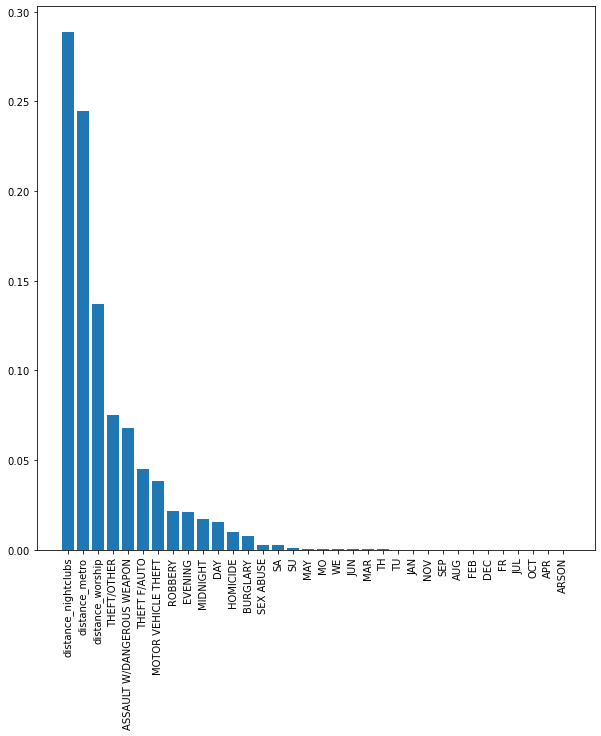

C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1: Covid


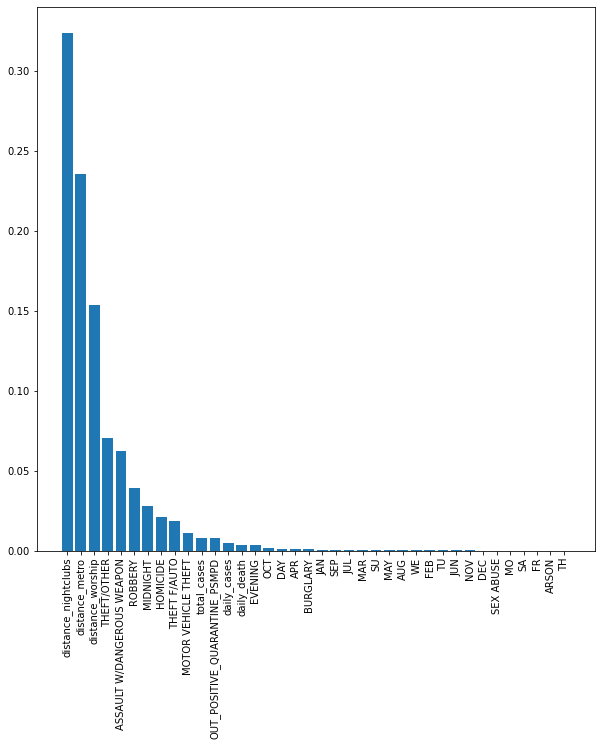

C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dataset shapes:
  X_train_PRE_COVID_Baseline: (73051, 34)
  X_train_PRE_COVID_Experiment: (30214, 34)

  X_train_COVID_Baseline: (30214, 38)
  X_train_COVID_Experiment: (73051, 38)
2: PRE-Covid


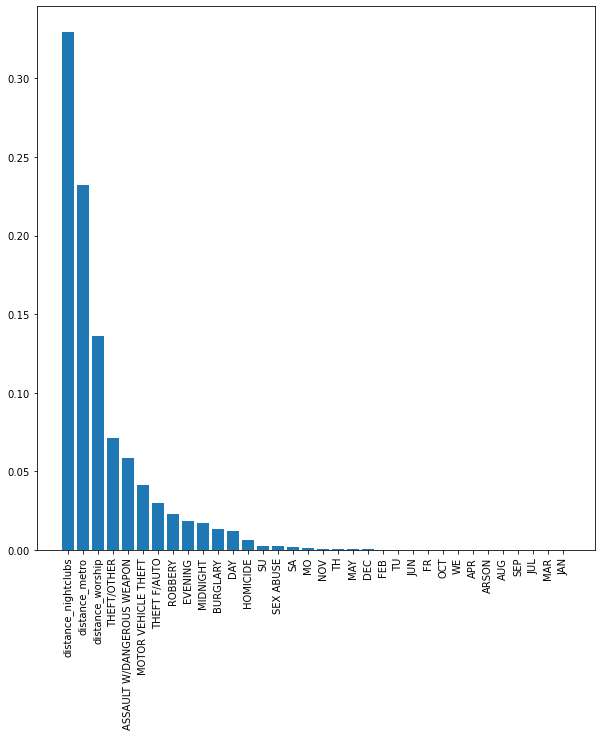

C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


2: Covid


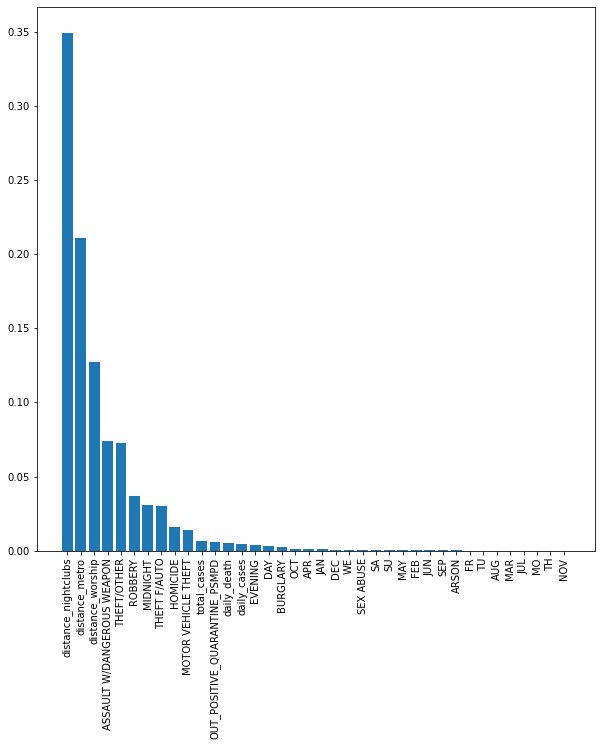

C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dataset shapes:
  X_train_PRE_COVID_Baseline: (73051, 34)
  X_train_PRE_COVID_Experiment: (30214, 34)

  X_train_COVID_Baseline: (30214, 38)
  X_train_COVID_Experiment: (73051, 38)
3: PRE-Covid


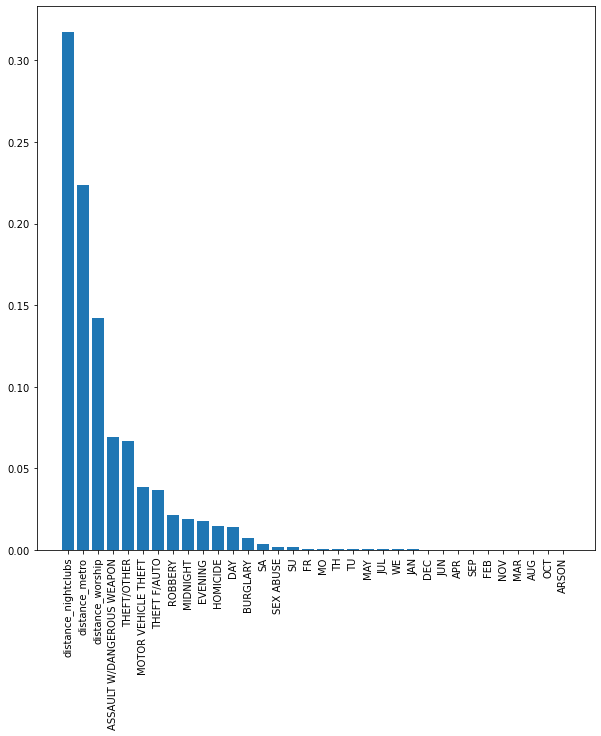

C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3: Covid


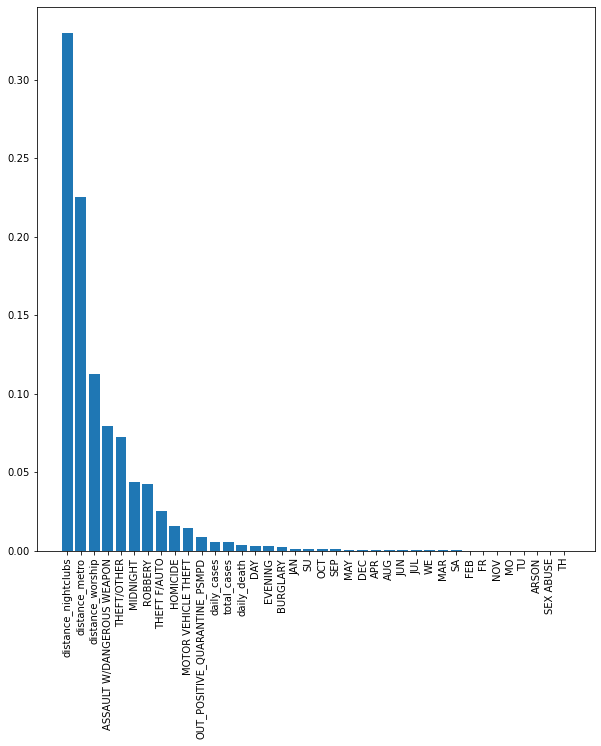

C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dataset shapes:
  X_train_PRE_COVID_Baseline: (73051, 34)
  X_train_PRE_COVID_Experiment: (30214, 34)

  X_train_COVID_Baseline: (30214, 38)
  X_train_COVID_Experiment: (73051, 38)
4: PRE-Covid


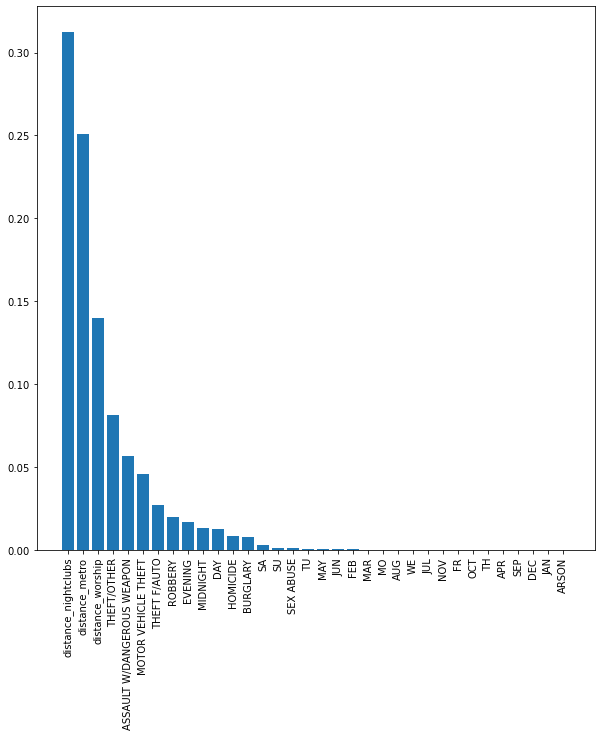

C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4: Covid


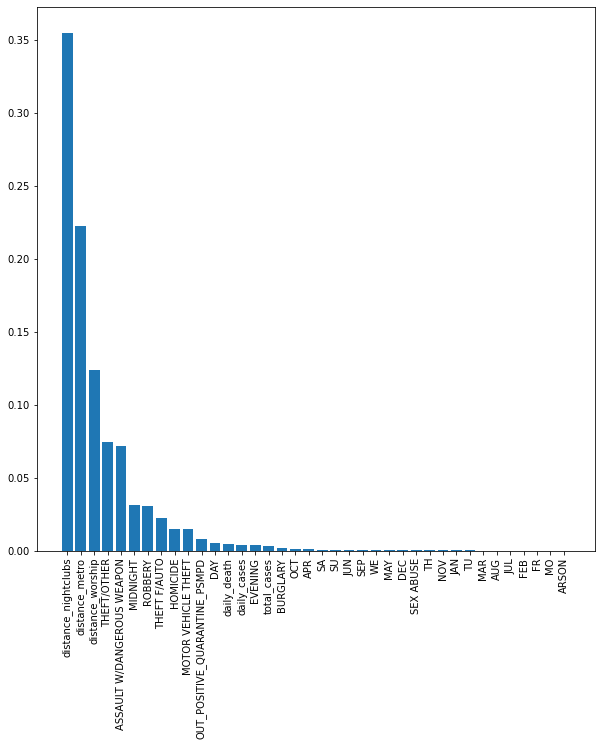

C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dataset shapes:
  X_train_PRE_COVID_Baseline: (73051, 34)
  X_train_PRE_COVID_Experiment: (30214, 34)

  X_train_COVID_Baseline: (30214, 38)
  X_train_COVID_Experiment: (73051, 38)
5: PRE-Covid


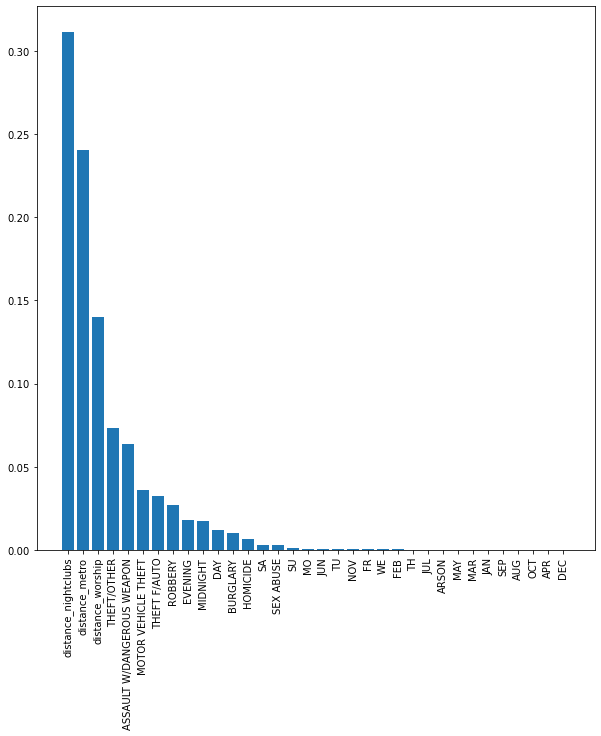

C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5: Covid


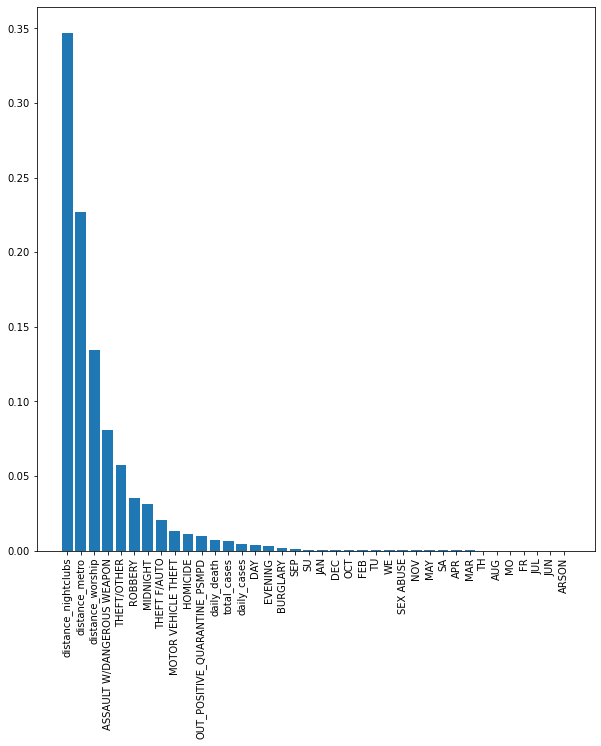

C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Peter\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
# get original data
random_state = [1, 10, 25, 40, 50]

###################
cross_val_score_lst_PRE_COVID_MODEL_base = []
pr_lst_PRE_COVID_MODEL_base = [] # list of [Precision, Recall] tuples from each Fold

cross_val_score_lst_COVID_MODEL_base = []
pr_lst_COVID_MODEL_base = [] # list of [Precision, Recall] tuples from each Fold

###################
cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment = []
pr_lst_PRE_COVID_MODEL_ON_COVID_experiment = []

cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment = []
pr_lst_COVID_MODEL_ON_PRE_COVID_experiment = []

###################
# go through validation splits
for val in range(0, 5):
    
    state_idx = val
    ############################
    #### GET Nth VALIDATION ####
    ############################
    # get Nth validation
    # Baseline:
    curr_X_train_PRE_COVID_unscaled_base, curr_X_test_PRE_COVID_unscaled_base, curr_y_train_PRE_COVID_base, curr_y_test_PRE_COVID_base = train_test_split(x_PRE_COVID_baseline_not_scaled, 
                                                                                                                                                          y_PRE_COVID_base,
                                                                                                                                                          test_size=0.3,
                                                                                                                                                          shuffle=True,
                                                                                                                                                          random_state=random_state[state_idx])
    
    curr_X_train_COVID_unscaled_base, curr_X_test_COVID_unscaled_base, curr_y_train_COVID_base, curr_y_test_COVID_base = train_test_split(x_COVID_baseline_not_scaled,
                                                                                                                                          y_COVID_base, 
                                                                                                                                          test_size=0.3, 
                                                                                                                                          shuffle=True,
                                                                                                                                          random_state=random_state[state_idx])
    # Experiment
    curr_X_train_PRE_COVID_unscaled_experiment, curr_X_test_PRE_COVID_unscaled_experiment, curr_y_train_PRE_COVID_experiment, curr_y_test_PRE_COVID_experiment = train_test_split(x_PRE_COVID_experiment_not_scaled,
                                                                                                                                                                                  y_PRE_COVID_experiment,
                                                                                                                                                                                  test_size=0.3, 
                                                                                                                                                                                  shuffle=True,
                                                                                                                                                                                  random_state=random_state[state_idx])
    
    curr_X_train_COVID_unscaled_experiment, curr_X_test_COVID_unscaled_experiment, curr_y_train_COVID_experiment, curr_y_test_COVID_experiment = train_test_split(x_COVID_experiment_not_scaled, 
                                                                                                                                                                  y_COVID_experiment, 
                                                                                                                                                                  test_size=0.3, 
                                                                                                                                                                  shuffle=True,
                                                                                                                                                                  random_state=random_state[state_idx])
    print("Dataset shapes:")
    print("  X_train_PRE_COVID_Baseline:", curr_X_train_PRE_COVID_unscaled_base.shape)
    print("  X_train_PRE_COVID_Experiment:", curr_X_train_PRE_COVID_unscaled_experiment.shape)
    print("")
    print("  X_train_COVID_Baseline:", curr_X_train_COVID_unscaled_base.shape)
    print("  X_train_COVID_Experiment:", curr_X_train_COVID_unscaled_experiment.shape)
    
    # Setup scaler and train on according baseline trains
    MinMax_scaler_PRE_COVID = MinMaxScaler(feature_range=(0, 1))
    MinMax_scaler_PRE_COVID = MinMax_scaler_PRE_COVID.fit(curr_X_train_PRE_COVID_unscaled_base) # Baseline Pre-COVID Train

    MinMax_scaler_COVID = MinMaxScaler(feature_range=(0, 1))
    MinMax_scaler_COVID = MinMax_scaler_COVID.fit(curr_X_train_COVID_unscaled_base) # Baseline COVID Train
    
    ####################
    #### SCALE DATA ####
    ####################
    # Scale the data (Base one, and experiment one)
    # For PRE_COVID:
    curr_x_train_PRE_COVID_base = MinMax_scaler_PRE_COVID.transform(curr_X_train_PRE_COVID_unscaled_base) # For training Pre-COVID model
    curr_x_test_PRE_COVID_base = MinMax_scaler_PRE_COVID.transform(curr_X_test_PRE_COVID_unscaled_base) # For testing Pre-COVID model (base)
    curr_x_test_PRE_COVID_on_COVID_experiment = MinMax_scaler_PRE_COVID.transform(curr_X_test_PRE_COVID_unscaled_experiment) # For testing Pre-COVID on COVID (experiment)

    # For COVID:
    curr_x_train_COVID_base = MinMax_scaler_COVID.transform(curr_X_train_COVID_unscaled_base) # For training COVID model
    curr_x_test_COVID_base = MinMax_scaler_COVID.transform(curr_X_test_COVID_unscaled_base) # For testing COVID model (base)
    curr_x_test_COVID_on_PRE_COVID_experiment = MinMax_scaler_COVID.transform(curr_X_test_COVID_unscaled_experiment) # For testing COVID on Pre-COVID (experiment)
    
    #############################
    #### PRE-COVID PRE-MODEL ####
    #############################
    curr_model_PRE_COVID = RandomForestClassifier(n_estimators = 800, max_depth = 2) #SVC(C=41, kernel='rbf') # SET YOUR MODEL HERE WITH ALL SELECTED HYPERPARAMETERS AND OTHER SETTINGS
    curr_model_PRE_COVID.fit(curr_x_train_PRE_COVID_base, curr_y_train_PRE_COVID_base)
    print(str(val+1) + ': PRE-Covid')
    importance = pd.Series(curr_model_PRE_COVID.feature_importances_, index = curr_X_test_PRE_COVID_unscaled_base.columns).sort_values(ascending = False)
    fig = plt.figure(figsize = (10,10))
    plt.bar(importance.index, importance.values)
    plt.xticks(rotation = 90)
    plt.show()
    preAvg.append(importance.values)
    # Get Pre-COVID Baseline:
    curr_accuracy_PRE_COVID_base = accuracy_score(curr_y_test_PRE_COVID_base, 
                                                  curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base))
    curr_precision_PRE_COVID_base = precision_score(curr_y_test_PRE_COVID_base, 
                                                    curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base),
                                                    average='macro') 
    curr_recall_PRE_COVID_base = recall_score(curr_y_test_PRE_COVID_base, 
                                              curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_base),
                                              average='macro')
    
    cross_val_score_lst_PRE_COVID_MODEL_base.append(curr_accuracy_PRE_COVID_base)
    pr_lst_PRE_COVID_MODEL_base.append([curr_precision_PRE_COVID_base, curr_recall_PRE_COVID_base])
    
    
    # Get Pre-COVID Experiment:
    curr_accuracy_PRE_COVID_experiment = accuracy_score(curr_y_test_PRE_COVID_experiment, 
                                                        curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment))
    curr_precision_PRE_COVID_experiment = precision_score(curr_y_test_PRE_COVID_experiment, 
                                                          curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment),
                                                          average='macro') 
    curr_recall_PRE_COVID_experiment = recall_score(curr_y_test_PRE_COVID_experiment, 
                                                    curr_model_PRE_COVID.predict(curr_x_test_PRE_COVID_on_COVID_experiment),
                                                    average='macro')
    
    cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment.append(curr_accuracy_PRE_COVID_experiment)
    pr_lst_PRE_COVID_MODEL_ON_COVID_experiment.append([curr_precision_PRE_COVID_experiment, curr_recall_PRE_COVID_experiment])
    
    
    #########################
    #### COVID PRE-MODEL ####
    #########################
    curr_model_COVID = RandomForestClassifier(n_estimators = 800, max_depth = 2) # SVC(C=41, kernel='rbf') # SET YOUR MODEL HERE WITH ALL SELECTED HYPERPARAMETERS AND OTHER SETTINGS
    curr_model_COVID.fit(curr_x_train_COVID_base, curr_y_train_COVID_base)
    print(str(val+1) + ': Covid')
    importance = pd.Series(curr_model_COVID.feature_importances_, index = curr_X_test_COVID_unscaled_base.columns).sort_values(ascending = False)
    fig = plt.figure(figsize = (10,10))
    plt.bar(importance.index, importance.values)
    plt.xticks(rotation = 90)
    plt.show()
    postAvg.append(importance.values)
    
    # Get COVID Baseline:
    curr_accuracy_COVID_base = accuracy_score(curr_y_test_COVID_base, 
                                              curr_model_COVID.predict(curr_x_test_COVID_base))
    curr_precision_COVID_base = precision_score(curr_y_test_COVID_base, 
                                                curr_model_COVID.predict(curr_x_test_COVID_base),
                                                average='macro') 
    curr_recall_COVID_base = recall_score(curr_y_test_COVID_base, 
                                          curr_model_COVID.predict(curr_x_test_COVID_base),
                                          average='macro')
    
    cross_val_score_lst_COVID_MODEL_base.append(curr_accuracy_COVID_base)
    pr_lst_COVID_MODEL_base.append([curr_precision_COVID_base, curr_recall_COVID_base])
    
    
    # Get COVID Experiment:
    curr_accuracy_COVID_experiment = accuracy_score(curr_y_test_COVID_experiment, 
                                                    curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment))
    curr_precision_COVID_experiment = precision_score(curr_y_test_COVID_experiment, 
                                                      curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment),
                                                      average='macro') 
    curr_recall_COVID_experiment = recall_score(curr_y_test_COVID_experiment, 
                                                curr_model_COVID.predict(curr_x_test_COVID_on_PRE_COVID_experiment),
                                                average='macro')
    
    cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment.append(curr_accuracy_COVID_experiment)
    pr_lst_COVID_MODEL_ON_PRE_COVID_experiment.append([curr_precision_COVID_experiment, curr_recall_COVID_experiment])

In [61]:
print("PRE-COVID Model Baseline:")
print("Accuracy scores from each fold:", cross_val_score_lst_PRE_COVID_MODEL_base)
print("Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_base)

PRE-COVID Model Baseline:
Accuracy scores from each fold: [0.3409671649418679, 0.34087134278778586, 0.3445125846429028, 0.3539989778970231, 0.3530407563562029]
Precision and Recall from each fold: [[0.19112884751057252, 0.27733405767862507], [0.19412761314897206, 0.2746642023178246], [0.19444837525820985, 0.27682037052956115], [0.19632927562619804, 0.28211504721887265], [0.19800398209625503, 0.2860250428914499]]


In [62]:
print("COVID Model Baseline:")
print("Accuracy scores from each fold:", cross_val_score_lst_COVID_MODEL_base)
print("Precision and Recall from each fold:", pr_lst_COVID_MODEL_base)

COVID Model Baseline:
Accuracy scores from each fold: [0.3444015444015444, 0.3433976833976834, 0.3461776061776062, 0.3457915057915058, 0.34772200772200773]
Precision and Recall from each fold: [[0.27888943203899974, 0.27982654699181375], [0.18045192964458368, 0.27839598853281394], [0.2755860485552298, 0.2808605763161121], [0.30528477249937647, 0.27881907966310315], [0.18116148642074947, 0.28067516405549453]]


In [63]:
print("PRE-COVID Model Experiment (on COVID Data):")
print("Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_PRE_COVID_MODEL_ON_COVID_experiment)
print("Precision and Recall from each fold:", pr_lst_PRE_COVID_MODEL_ON_COVID_experiment)

PRE-COVID Model Experiment (on COVID Data):
Accuracy scores from each fold: [0.3166023166023166, 0.3193050193050193, 0.3172972972972973, 0.32262548262548263, 0.3227027027027027]
Precision and Recall from each fold: [[0.1917859059330133, 0.2725895064475616], [0.19041255574642496, 0.27369399690183666], [0.192498498724798, 0.2734419892865514], [0.1921207734576666, 0.2768007318066974], [0.19303615131546276, 0.28087871806087017]]


In [64]:
print("COVID Model Experiment (on Pre-COVID Data):")
print("Accuracy scores from each fold:", cross_val_score_lst_TEST_ONLY_COVID_MODEL_ON_PRE_COVID_experiment)
print("Precision and Recall from each fold:", pr_lst_COVID_MODEL_ON_PRE_COVID_experiment)

COVID Model Experiment (on Pre-COVID Data):
Accuracy scores from each fold: [0.3258592053149355, 0.3271048933180018, 0.33202376389421234, 0.3285102849112048, 0.32930880286188835]
Precision and Recall from each fold: [[0.26030971022456306, 0.2866394255821958], [0.17667494989241916, 0.28385214978501094], [0.2628477541581276, 0.2860083519279167], [0.2838649977553512, 0.2834730622455721], [0.17674632065059837, 0.2858694747722127]]


0.31173643619855085
0.2382870955667146
0.13898926490907043
0.07406376552082786
0.06267122436476888
0.04128066472088213
0.032988164080898864
0.022514569251883297
0.01861613503276395
0.01647857703899199
0.013691071145212235
0.010901935132840001
0.007227133824793716
0.0029304553214425794
0.0022189423232493602
0.0013931818588833417
0.0008302615503565843
0.0005031863505210852
0.0004746271896839344
0.00033935606085741093
0.00028989263328217527
0.00024748219204663574
0.00021852866743669067
0.00018930253546377195
0.0001638297633196944
0.00014963137409322136
0.00013841690503853666
0.00010975190251872015
9.991304021095957e-05
9.072104920962326e-05
7.05887109271133e-05
5.267954359458234e-05
2.6832167179165937e-05
1.6382072486047072e-05


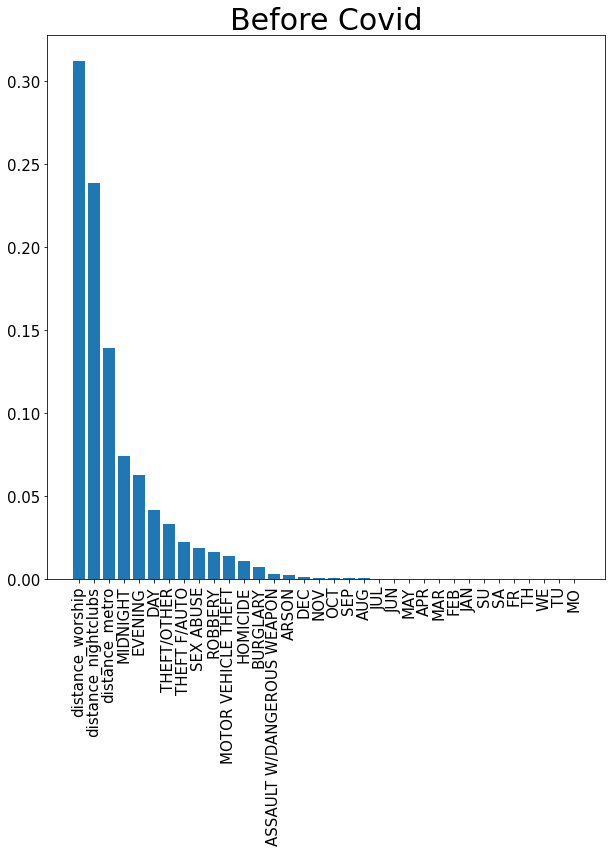

In [125]:
preAvg2 = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
count = 0
for i in preAvg:
    preAvg2 = np.add(preAvg2, i)


for i in range(len(preAvg2)):
    preAvg2[i] = preAvg2[i]/5
for i in preAvg2:
    print(i)

    
aw034958ha39485h = []
for i in curr_X_test_PRE_COVID_unscaled_base.columns:
    aw034958ha39485h.append(i)

fig = plt.figure(figsize = (10,10))
plt.bar(aw034958ha39485h[::-1], preAvg2)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('Before Covid', fontsize = 30)
plt.show()

0.34089352324236405
0.2241487207408388
0.13040226783887038
0.07575488400939431
0.06726739615849178
0.03732605231426018
0.032742694238306794
0.023954547344260203
0.01568587911576146
0.013124433123194112
0.008343964716657427
0.00641289773405678
0.005353594845133093
0.0040797072149019375
0.0035512437431442995
0.00294726522855276
0.0018716694539510543
0.0010765036158532579
0.0008781691076598667
0.0007294493434375394
0.0005621477654654429
0.0004451349743793519
0.0003870519687508353
0.00034707306544139307
0.0002844970669136209
0.00025641396375336036
0.0002229933548630447
0.000197126555106255
0.00016617478493204633
0.00015583305299845949
0.00011923590529584315
9.6647207826883e-05
7.611428692542394e-05
5.7751606169747206e-05
3.594366622001977e-05
2.5716319143823157e-05
1.4505708168885845e-05
4.775618555534104e-06


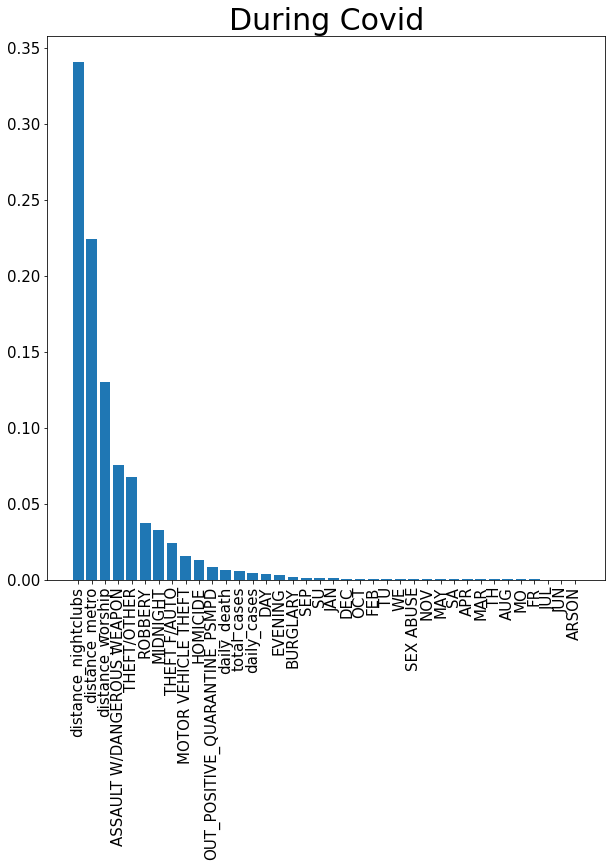

In [123]:
postAvg2 = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
count = 0
for i in postAvg:
    postAvg2 = np.add(postAvg2, i)


for i in range(len(postAvg2)):
    postAvg2[i] = postAvg2[i]/5
for i in postAvg2:
    print(i)

    
aw034958ha39485h = []
for i in importance.index:
    aw034958ha39485h.append(i)

fig = plt.figure(figsize = (10,10))
plt.bar(aw034958ha39485h, postAvg2)
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title('During Covid', fontsize = 30)
plt.show()